In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
from bs4 import BeautifulSoup
from google.colab import drive
from tqdm import tqdm
import random
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'casestudy')
drive.mount(MOUNTPOINT)
dirPath = os.getcwd()
print(dirPath)

Mounted at /content/gdrive
/content


### Data Loading

We will load the data from the 2 novels:
1. BOLO The Cave Boy
2. The Shoemaker

In [ ]:
file = open(dirPath+'/gdrive/My Drive/casestudy/pg69405.txt', 'r')
novel1 = str(file.read())
print(len(novel1))
print(novel1[:1000])
print(novel1[-1000:])

50761
﻿Bolo the Cave Boy




CHAPTER I How Bolo Got His Dinner


Bolo crept carefully through the tall grass. With one brown hand he
parted the stalks before him, and in the other he carried a noose made
from a slender willow withe. His bright, black eyes peered cautiously
about at every step.

Some distance ahead of him a small gray rabbit was hopping slowly
along, stopping here and there to take a nibble of tender, young grass,
or to stand up on his hind legs and look about him. Bolo was hungry and
he thought a little rabbit would make him a good dinner.

Closer and closer he crept. He raised the noose for a throw. Then all
at once the little animal pricked up his long ears, gave one startled
look ahead and plunged off into the thick grass.

At the same moment a boy about as large as Bolo broke through the grass
just beyond where the rabbit had stood. He did not see the rabbit. All
he saw was Bolo standing with arm upraised and an angry frown on his
dark face.

Bolo struck at the boy

In [ ]:
file = open(dirPath+'/gdrive/My Drive/casestudy/pg69408.txt', 'r')
novel2 = str(file.read())
print(len(novel2))
print(novel2[:1000])
print(novel2[-1000:])

200364
﻿THE SHOEMAKER




PROLOGUE.


In one of the small side streets that end in the Bowery, on the East
Side, is a row of small and dilapidated buildings, which once, in the
early days of New York, were the dwellings of fashionable people, but
which are now occupied by poor but industrious people. The majority
of these houses have some small business carried on in the basement
cellars.

The people who occupy the houses above the cellar stores or workshops
are mostly of the poor but industrious Hebrews who toil early and late
to build up a little business in this land of freedom, a business which
is really and truly their own, to have and to hold without persecution
or robbery.

The house where Morris Goldberg had found a shelter and a chance
to show of what stuff he was made was, if possible, a little more
disreputable in appearance than the others in that row, but to him, who
had gone through the horrors of the Kishineff massacre, robbed of his
all, save his wife and little daughte

In [ ]:
# Concatenate the two novels.
novel = novel1+novel2
print(len(novel))
print(novel[:1000])
print(novel[-1000:])

251125
﻿Bolo the Cave Boy




CHAPTER I How Bolo Got His Dinner


Bolo crept carefully through the tall grass. With one brown hand he
parted the stalks before him, and in the other he carried a noose made
from a slender willow withe. His bright, black eyes peered cautiously
about at every step.

Some distance ahead of him a small gray rabbit was hopping slowly
along, stopping here and there to take a nibble of tender, young grass,
or to stand up on his hind legs and look about him. Bolo was hungry and
he thought a little rabbit would make him a good dinner.

Closer and closer he crept. He raised the noose for a throw. Then all
at once the little animal pricked up his long ears, gave one startled
look ahead and plunged off into the thick grass.

At the same moment a boy about as large as Bolo broke through the grass
just beyond where the rabbit had stood. He did not see the rabbit. All
he saw was Bolo standing with arm upraised and an angry frown on his
dark face.

Bolo struck at the bo

###Data Pre-processing

####1. Novels

Let us verify the unicode characters in the novel text.

In [ ]:
'''inv = set()
inv = set(re.findall(r'\\x.{10}', novel))
print(inv)'''

"inv = set()\ninv = set(re.findall(r'\\x.{10}', novel))\nprint(inv)"

We can see that these are Unicode representation of certain special characters. Let us replace these with the appropriate special characters.

In [ ]:
'''def unitoascii(text):  
  text = text.replace('\\xe2\\x80\\x9c', '"')
  text = text.replace('\\xe2\\x80\\x9d', '"')
  text = text.replace('\\xe2\\x80\\x98', "'")
  text = text.replace('\\xe2\\x80\\x99', "'")

  # remove Unicode BOM(Byte Order Mark)
  text = text.replace('\'b\'\\xef\\xbb\\xbf', "")
  text = text.replace('b\'\\xef\\xbb\\xbf', "")

  return text'''

'def unitoascii(text):  \n  text = text.replace(\'\\xe2\\x80\\x9c\', \'"\')\n  text = text.replace(\'\\xe2\\x80\\x9d\', \'"\')\n  text = text.replace(\'\\xe2\\x80\\x98\', "\'")\n  text = text.replace(\'\\xe2\\x80\\x99\', "\'")\n\n  # remove Unicode BOM(Byte Order Mark)\n  text = text.replace(\'\'b\'\\xef\\xbb\\xbf\', "")\n  text = text.replace(\'b\'\\xef\\xbb\\xbf\', "")\n\n  return text'

In [ ]:
#https://gist.github.com/tushortz/9fbde5d023c0a0204333267840b592f9
'''novel = unitoascii(novel)'''

'novel = unitoascii(novel)'

In [ ]:
'''print(len(novel))
print(novel[:1000])
print(novel[-1000:])'''

'print(len(novel))\nprint(novel[:1000])\nprint(novel[-1000:])'

In [ ]:
'''inv = set()
inv = set(re.findall(r'\\x.{10}', novel))
print(inv)'''

"inv = set()\ninv = set(re.findall(r'\\x.{10}', novel))\nprint(inv)"

Firstly let us find all the special characters in the novel text and its relevance to our problem.

In [ ]:
print(set(re.findall(r'[^a-zA-Z0-9\s]',novel)))

{'(', '-', ':', '’', '!', '&', '\ufeff', '[', '”', '_', '*', '?', '.', ';', ']', ',', ')', '“', '‘'}


Based on analysis of the above special characters - the below cleanup is done.

In [ ]:
novel = re.sub('_',' ',novel)
novel = novel.replace('[Illustration','')
novel = re.sub(r'\“|\”|\"','',novel)
novel = re.sub(r'--','-',novel)
novel = re.sub(']','',novel)
novel = re.sub('\*','',novel)
novel = novel.replace('(. : . : .)','')
novel = novel.replace('\ufeff','')
novel = re.sub('\\r|\\n|\\t|\\r\\n', ' ',novel) # Remove extra new lines/tabs
novel = re.sub(r'Mrs\.','Mrs ',novel) # Remove fullstops from personal titles
novel = re.sub(r'Mr\.','Mr ',novel)
novel = re.sub(r'Ms\.','Ms ',novel)
novel = re.sub(r'Dr\.','Dr ',novel)
# We will split the text with '.', '?', '!'. We will also retain the above 3 punctuations.
novel = re.sub(r'\.', '<>.', novel)  
novel = re.sub(r'\?', '?.', novel) 
novel = re.sub(r'\!', '!.', novel)
novel = re.sub(' +', ' ', novel) # Remove extra spaces 

In [ ]:
print(set(re.findall(r'[^a-zA-Z0-9\s]',novel)))

{'-', '&', '<', '?', '!', '.', '>', ':', ';', '’', '‘', ','}


In [ ]:
print(len(novel))
print(novel[:1000])
print(novel[-1000:])

252965
Bolo the Cave Boy CHAPTER I How Bolo Got His Dinner Bolo crept carefully through the tall grass<>. With one brown hand he parted the stalks before him, and in the other he carried a noose made from a slender willow withe<>. His bright, black eyes peered cautiously about at every step<>. Some distance ahead of him a small gray rabbit was hopping slowly along, stopping here and there to take a nibble of tender, young grass, or to stand up on his hind legs and look about him<>. Bolo was hungry and he thought a little rabbit would make him a good dinner<>. Closer and closer he crept<>. He raised the noose for a throw<>. Then all at once the little animal pricked up his long ears, gave one startled look ahead and plunged off into the thick grass<>. At the same moment a boy about as large as Bolo broke through the grass just beyond where the rabbit had stood<>. He did not see the rabbit<>. All he saw was Bolo standing with arm upraised and an angry frown on his dark face<>. Bolo struc

####2. Movies

In [ ]:
movie_file = open(dirPath+'/gdrive/My Drive/casestudy/movie_lines.txt', 'r', errors='ignore')
i = 0
for f in movie_file:
  i=i+1
  if(i<10):
    print(f)    
movie_file.close()

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!

L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!

L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.

L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?

L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.

L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow

L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.

L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No

L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?



We need to remove the long prefix string preceding the actual dialogue.

In [ ]:
movie_file = open(dirPath+'/gdrive/My Drive/casestudy/movie_lines.txt', 'r', errors='ignore')
lt = []
for f in movie_file:
  lt.extend(re.findall('[^a-zA-Z0-9\s]',str(f)))
movie_file.close()
print((set(lt)))

{'-', '%', ':', '}', '!', '&', '+', '[', '=', '<', '{', ')', '#', '_', '*', '/', '?', '.', "'", ';', '>', '"', ']', '~', ',', '|', '^', '$', '`'}


The above are the special characters found in the corpus text. We will evaluate each of them and remove/replace the unnecesary ones.

In [ ]:
def removeHtml(text):
    soup = BeautifulSoup(text, 'html.parser')
    cleanText = soup.get_text()
    return cleanText

In [ ]:
movie_file = open(dirPath+'/gdrive/My Drive/casestudy/movie_lines.txt', 'r', errors='ignore')
flist = list()
for f in movie_file:
  f = str(f)
  f = re.sub('L.*\$\+\+\+ ','',f) # Remove Prefix
  f = re.sub(r'b\"|b\'','',f) 
  f = re.sub(r'\n','',f) # Remove new line
  f = re.sub('\\r|\\n|\\t|\\r\\n', ' ',f)
  f = f.replace('[Beat]', ' ') # [Beat] is mentioned many times in the corpus - not a dialogue line -not useful
  f = removeHtml(f)
  f = re.sub(r'\“|\”|\"','',f)
  f = re.sub(r'--','-',f)
  f = re.sub(r'[#\)\*\+\^\]\[_\{\}|~<>]','',f) # Remove irrelavent spl. characters
  f = re.sub(r'[-=]',' ',f)
  f = re.sub(r'Mrs\.','Mrs ',f) # Remove fullstops from personal titles
  f = re.sub(r'Mr\.','Mr ',f)
  f = re.sub(r'Ms\.','Ms ',f)
  f = re.sub(r'Dr\.','Dr ',f)
  f = re.sub(r'\.\.+', '.', f) # replace multiple dots with single .
  f = re.sub(r'\\','',f)
  f = re.sub(' +', ' ', f) # Remove extra spaces
  # We will split the text with '.', '?', '!'. We will also retain the above 3 punctuations.
  f = re.sub(r'\.', '<>.', f)  
  f = re.sub(r'\?', '?.', f) 
  f = re.sub(r'\!', '!.', f)
  flist.append(f)
movie_file.close()
print(len(flist))

304713


### Data Preparation

We will now split the above processed data to sentences.

In [ ]:
novel_text = []
novel_text.extend(novel.split('.'))
# Put the full stop back.
for i in range(len(novel_text)):
  novel_text[i] = novel_text[i].replace('<>','.').strip()
novel_text = list(set(novel_text))
len(novel_text)

3386

We will split the preprocessed text from movie corpus to sentences.

In [ ]:
movie_diag = []
for l in flist:
  movie_diag.extend(l.split('.'))
# Put the full stop back.
for i in range(len(movie_diag)):
  movie_diag[i] = movie_diag[i].replace('<>','.').strip()
movie_diag = list(set(movie_diag))
len(movie_diag)

418087

In [ ]:
# Combine the two text corpuses.
movie_diag.extend(novel_text)
len(movie_diag)

421473

Word Count Thresholds

In [ ]:
lenlist = [len(l.split()) for l in movie_diag]

In [ ]:
print('Max word count:',max(lenlist))
print('Min word count:',min(lenlist))
print('Avg word count:',np.round(np.mean(lenlist)))

Max word count: 156
Min word count: 0
Avg word count: 7.0


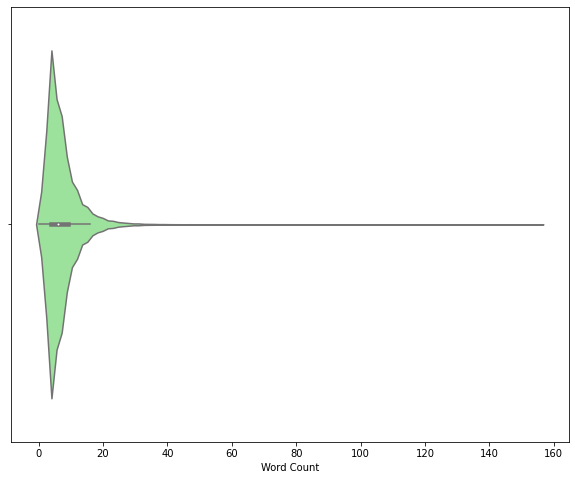

In [ ]:
plt.subplots(figsize=(10,8))
sns.violinplot(lenlist,color='lightgreen')
plt.xlabel('Word Count')
plt.show()

We see the median word count is around 6 words per sentence.
There are considerable number of outliers after a word count of 20. The maximum word count concentration is around 7 words per sentence.

To keep sentences short and meaningful, we will use sentences with number of words ranging from 5 to 20.

In [ ]:
inpLst = [l for l in movie_diag if len(l.split())>3 and len(l.split())<20]
print(len(inpLst))
print(inpLst[:10])
print(inpLst[-10:])

319978
["I'll be right back.", 'Your teeth are fine.', "Thanks, Bobby, 'bout done.", "We'll leave it for now.", "Now I'm going to have it mounted and have my girlfriends over to throw darts at it.", 'You always see geese.', 'I came here and I made Mr Kane come with me.', 'Was the Baron joking, or is it really true that the Baron is in financial straits.', "If you won't sleep with me this time", 'Got that desert yet.']
['She must be silenced forever!', 'What are you doing?', 'In this way the cave people came at last to grind grain for bread.', 'It wouldn’t be noticed if he was to get a stray bullet in his gizzard now.', 'And see how many branches, and even great trees, are floating down on it.', 'I know I’m right.', 'The water never comes into my cave, said Flame.', 'How am I to get there?', 'You cannot vear dot now, mein child.', 'I’ll carry one over.']


We have preprocessed and split the text corpus into input sentences.

In [ ]:
for i in range(len(inpLst)):
  inpLst[i] = re.sub(r"[^A-Za-z0-9\'\s]","", inpLst[i]) # Remove special characters except '
  inpLst[i] = inpLst[i].lower() # Convert to lower.

### Introduce Random Perturbations

We will introduce the following grammatical errors in the grammatically correct conversational english sentences.

**Phonetically similar words:**

1. Replace 'there' with 'their'
2. Replace 'then' with 'than'
3. Replace 'their' with 'there'
4. Replace 'than' with 'then'

**Indefinite Articles**

5. Remove 'a'
6. 50% random: replace 'a' with 'an'.
7. Remove 'an'
8. 50% random: replace 'an' with 'a'.

**Verb Contractions**

9. Remove: 've
10. Remove: 're
11. Remove: 'll
12. Remove: 's

**Definite Article**

13. Remove 'the'

**Auxiliary Verbs**

14. Replace 'is' with 'are'
15. Replace 'were' with 'was'
16. Replace 'are' with 'is'

**Common Grammatical Mistakes**

17. Replace 'didn't have' with 'didn't had'

In [ ]:
def pertuber(r,text):
  '''
  Introduce grammatical errors
  '''
  correct_text = []
  pertubed_text = []

  if ' there ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bthere\b','their',text))
  if ' then ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bthen\b','than',text))
  if ' their ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\btheir\b','there',text))    
  if ' than ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bthan\b','then',text))    

  if ' a ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\ba\b','',text).replace('  ',' '))      
    if(r%2==0):
      correct_text.append(text)
      pertubed_text.append(re.sub(r'\ba\b','an',text))

  if ' an ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\ban\b','',text).replace('  ',' '))      
    if(r%2==0): #50% chance
      correct_text.append(text)
      pertubed_text.append(re.sub(r'\ban\b','a',text))

  if(re.findall(r'\'ve',text)):
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\'ve','',text))

  if(re.findall(r'\'re',text)):
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\'re','',text))    

  if(re.findall(r'\'ll',text)):
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\'ll','',text))

  if(re.findall(r'\'s',text)):
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\'s','',text))   

  if(re.findall(r'\'m',text)):
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\'m','',text))       

  if ' the ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bthe\b','',text).replace('  ',' '))  

  if ' didn\'t have ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bdidn\'t have\b','didn\'t had',text)) 

  if ' is ' in text:
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bis\b','are',text))
  if ' were ' in text: 
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bwere\b','was',text))

  if ' are ' in text: 
    correct_text.append(text)
    pertubed_text.append(re.sub(r'\bare\b','is',text))

  return correct_text, pertubed_text

In [ ]:
input = list()
output = list()
for i in range(len(inpLst)):
  r = np.random.randint(1,5) # 25% chance.
  correct_text, pertubed_text = pertuber(r,inpLst[i])
  output.extend(correct_text) # Expected correct text - to predict.
  input.extend(pertubed_text) # Perturbed incorrect text - input.

In [ ]:
print(len(inpLst))
print(len(input))
print(len(output))

319978
287023
287023


In [ ]:
for i in range(50,54):
    print("\nCorrect: "+output[i])
    print("Incorrect: "+input[i])  


Correct: i'll suck your eyes out
Incorrect: i suck your eyes out

Correct: you're a smart man
Incorrect: you're smart man

Correct: you're a smart man
Incorrect: you a smart man

Correct: i'm here you're here the piano's here
Incorrect: i'm here you here the piano's here


In [ ]:
df = pd.DataFrame({'ePerturb_Input':input,'dCorrect':output})

In [ ]:
df

,ePerturb_Input,dCorrect
0,i be right back,i'll be right back
1,your teeth is fine,your teeth are fine
2,we leave it for now,we'll leave it for now
3,now i going to have it mounted and have my gir...,now i'm going to have it mounted and have my g...
4,was baron joking or is it really true that bar...,was the baron joking or is it really true that...
...,...,...
287018,you see me well and strong quite a different b...,you see me well and strong quite a different b...
287019,what is you doing,what are you doing
287020,in this way cave people came at last to grind ...,in this way the cave people came at last to gr...
287021,it wouldnt be noticed if he was to get stray b...,it wouldnt be noticed if he was to get a stray...


In [ ]:
# Add <start> and <end> tags to signal the start and end of sequences.
df['dCorrect_input'] = '<start> '+df['dCorrect'].astype(str)
df['dCorrect_output'] = df['dCorrect'].astype(str) +' <end>'
df.drop(['dCorrect'], axis=1, inplace=True)

In [ ]:
df.head()

,ePerturb_Input,dCorrect_input,dCorrect_output
0,i be right back,<start> i'll be right back,i'll be right back <end>
1,your teeth is fine,<start> your teeth are fine,your teeth are fine <end>
2,we leave it for now,<start> we'll leave it for now,we'll leave it for now <end>
3,now i going to have it mounted and have my gir...,<start> now i'm going to have it mounted and h...,now i'm going to have it mounted and have my g...
4,was baron joking or is it really true that bar...,<start> was the baron joking or is it really t...,was the baron joking or is it really true that...


In [ ]:
df.to_excel(dirPath+'/gdrive/My Drive/casestudy/deep_text.xlsx',index=False)
#df = pd.read_excel(dirPath+'/gdrive/My Drive/casestudy/deep_text.xlsx')